# Training a Sign Language
In the following notebook we will be training a Neural Network to classify the hand sign language:

![SignLanguaje](Images/signLanguage.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv

## Load the Data from the CSVs

In [8]:
data = []
labels = []
for path in os.listdir(path= 'CSV'):
    if path.endswith('.csv'):
        print(f'Loading {path} data...')
        with open(f'CSV/{path}', 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                data.append(row)

Loading W.csv data...
Loading V.csv data...
Loading A.csv data...
Loading C.csv data...
Loading T.csv data...
Loading U.csv data...
Loading B.csv data...
Loading Q.csv data...
Loading F.csv data...
Loading G.csv data...
Loading P.csv data...
Loading R.csv data...
Loading E.csv data...
Loading D.csv data...
Loading S.csv data...
Loading I.csv data...
Loading H.csv data...
Loading J.csv data...
Loading K.csv data...
Loading O.csv data...
Loading X.csv data...
Loading Y.csv data...
Loading N.csv data...
Loading L.csv data...
Loading Z.csv data...
Loading M.csv data...


In [9]:
col_names = [ f'landmark{i+1}' for i in range(0, len(data[0])-1)]
col_names.append('Target')

df = pd.DataFrame(data, columns= col_names)
df.iloc[:, :-1] = df.iloc[:, :-1].astype(np.float32)
df

,landmark1,landmark2,landmark3,landmark4,landmark5,landmark6,landmark7,landmark8,landmark9,landmark10,...,landmark433,landmark434,landmark435,landmark436,landmark437,landmark438,landmark439,landmark440,landmark441,Target
0,0.0,0.041063,0.106661,0.160228,0.178243,0.182223,0.258694,0.303614,0.344335,0.189522,...,0.202192,0.022069,0.092226,0.143509,0.188412,0.023366,0.048025,0.028567,0.0,W
1,0.0,0.042664,0.111776,0.167262,0.193099,0.185471,0.263519,0.308931,0.350407,0.193323,...,0.197583,0.02295,0.088596,0.13801,0.18219,0.028072,0.043532,0.025434,0.0,W
2,0.0,0.043011,0.113041,0.168215,0.193004,0.185568,0.263018,0.30659,0.346846,0.192333,...,0.1953,0.022018,0.087486,0.137364,0.181655,0.028889,0.045124,0.026827,0.0,W
3,0.0,0.043125,0.113121,0.166589,0.189455,0.186066,0.263809,0.308166,0.34849,0.193271,...,0.197292,0.02366,0.089423,0.140035,0.18432,0.025613,0.041759,0.025095,0.0,W
4,0.0,0.043373,0.115581,0.168955,0.189597,0.188507,0.266874,0.311977,0.353792,0.19548,...,0.200819,0.023695,0.092005,0.142571,0.188101,0.02346,0.045816,0.02662,0.0,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,0.0,0.043894,0.094577,0.116636,0.121226,0.174665,0.193483,0.146299,0.112209,0.181928,...,0.042929,0.1371,0.131134,0.063887,0.024525,0.120544,0.084737,0.031392,0.0,M
6401,0.0,0.04454,0.095138,0.118676,0.122908,0.177582,0.195651,0.148783,0.116457,0.184379,...,0.04601,0.136545,0.127415,0.060005,0.025162,0.11829,0.081619,0.029149,0.0,M
6402,0.0,0.0448,0.097153,0.119519,0.120747,0.178534,0.195144,0.147309,0.115123,0.18551,...,0.044918,0.137288,0.125845,0.059585,0.024888,0.118941,0.081954,0.029459,0.0,M
6403,0.0,0.04398,0.094976,0.117434,0.124198,0.179105,0.196234,0.147751,0.114982,0.185337,...,0.04524,0.136607,0.12683,0.06178,0.026287,0.118245,0.081854,0.029718,0.0,M


In [10]:
df['Target'].value_counts()

Target
W    250
X    250
K    250
J    250
H    250
I    250
S    250
E    250
Y    250
P    250
Q    250
N    250
T    250
C    250
O    250
V    249
U    249
A    249
G    247
F    247
D    246
M    246
R    240
B    231
Z    231
L    220
Name: count, dtype: int64

In [11]:
"""
    Remove Columns equal to 0.
    We must remove the columns equal to 0, since this column represent the distance between
    the same landmark. There are 21 landmarks, this means it will be 21 columns full of zeros.
    
    21 * 21= 441   -> L2 norm between each pair of landmarks
    441 - 21= 420  -> Remove the columns where the same landmark compute the L2 with itself.

    420 features
"""

ind = np.where(df.iloc[0, :].values == 0)[0]
cols_remove = df.columns.values[ind]
df.drop(columns= cols_remove, inplace= True)

## Data Preprocessing

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [19]:
# DataFrame to Numpy array
x_data = df.iloc[:, :-1].values.astype(np.float32)
y_data = df.Target.values
k_classes = len(np.unique(df.Target.values))

# Encode Labels
enc = LabelEncoder()
encoded_labels = enc.fit_transform(y_data)
y_data = to_categorical(encoded_labels, num_classes= k_classes)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, train_size= 0.95)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, train_size= 0.5)

print(f"""
    Training: {x_train.shape}
    Validation: {x_val.shape}
    Testing: {x_test.shape}
""")


    Training: (6084, 420)
    Validation: (160, 420)
    Testing: (161, 420)



In [20]:
enc.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

## Build the Neural Network

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [23]:
network = Sequential()

network.add(Dense(units= 200, activation= 'elu', input_dim= x_train.shape[1]))
network.add(BatchNormalization())
network.add(Dense(units= 200, activation= 'elu'))
network.add(BatchNormalization())
network.add(Dense(units= 200, activation= 'elu'))
network.add(BatchNormalization())
network.add(Dense(units= 200, activation= 'elu'))
network.add(BatchNormalization())
network.add(Dense(units= k_classes, activation= 'softmax'))

network.compile(
    optimizer= 'rmsprop',
    loss= 'categorical_crossentropy',
    metrics= 'accuracy'
)

history = network.fit(
    x_train, y_train,
    epochs= 50,
    validation_data= (x_val, y_val)
)

Epoch 1/50
191/191 [==============================] - 2s 4ms/step - loss: 0.2110 - accuracy: 0.9426 - val_loss: 1.2454 - val_accuracy: 0.6062
Epoch 2/50
191/191 [==============================] - 1s 3ms/step - loss: 0.0698 - accuracy: 0.9837 - val_loss: 1.0296 - val_accuracy: 0.7437
Epoch 3/50
191/191 [==============================] - 1s 3ms/step - loss: 0.0612 - accuracy: 0.9836 - val_loss: 0.5992 - val_accuracy: 0.7875
Epoch 4/50
191/191 [==============================] - 1s 3ms/step - loss: 0.0342 - accuracy: 0.9910 - val_loss: 0.2577 - val_accuracy: 0.9563
Epoch 5/50
191/191 [==============================] - 1s 3ms/step - loss: 0.0396 - accuracy: 0.9905 - val_loss: 0.5892 - val_accuracy: 0.8500
Epoch 6/50
191/191 [==============================] - 1s 3ms/step - loss: 0.0264 - accuracy: 0.9926 - val_loss: 0.8187 - val_accuracy: 0.8750
Epoch 7/50
191/191 [==============================] - 1s 3ms/step - loss: 0.0250 - accuracy: 0.9936 - val_loss: 1.1459 - val_accuracy: 0.6375
Epoch 

<Axes: >

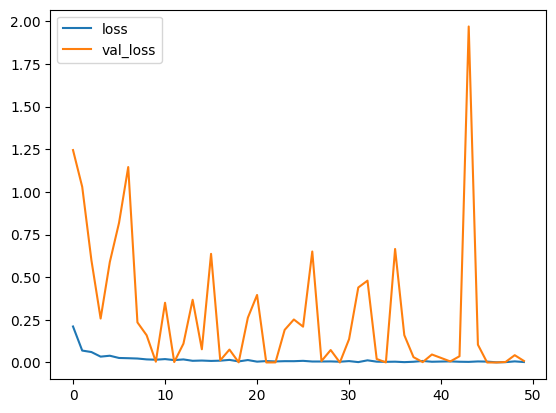

In [24]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()

In [25]:
network.evaluate(x_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.0071 - accuracy: 0.9938


[0.007116327527910471, 0.9937888383865356]

## Save the Model

In [27]:
network.save('SignLanguage.keras')